# AI Lab 3 
# Date Range "2021-08-01" to "2022-02-01"

Our group will be performing regression on 
"Daily Hospital Admission Rate" which represents the percentage of hospital admission per new covid positive cases in one day 
using two different regression models: 
1. Linear Regression
2. Support Vector Regression (SVR)
3. Random Forest Regressor
4. K-Nearest Neighbour Regression

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Read CSV Files

In [2]:
#Read csv files
cases = pd.read_csv("cases_malaysia.csv")
hospital = pd.read_csv("hospital.csv")
pkrc = pd.read_csv("pkrc.csv")
vax = pd.read_csv("vax_malaysia.csv")

# Data Preprocessing & Data Cleaning

In this section, we perform data preprocessing and data cleaning.
1. load the features and target from the csv files
2. remove null or duplicated data
3. remove outliers

### 1. hospital.csv

In [3]:
# Define date range
startDate = '2021-08-01'
endDate = '2022-02-01'

# Convert 'date' string to datetime
hospital['date'] = pd.to_datetime(hospital['date'])

# Select date rows within the range
hosDateRange = hospital[(hospital['date'] >= startDate) & (hospital['date'] <= endDate)]

# Sum of admitted covid
sumAdmitCovid = hosDateRange.groupby('date')['admitted_covid']
sumAdmitCovid = sumAdmitCovid.sum()

# Select feature columns under selected date rows and remove null or redundant data
hospitalData = pd.DataFrame({'date': sumAdmitCovid.index,
                             'admitted_covid': sumAdmitCovid.values
                            })

# Remove redundant data
hospitalData = hospitalData.dropna().drop_duplicates()

# Output data summary
hospitalData

,date,admitted_covid
0,2021-08-01,2113
1,2021-08-02,2140
2,2021-08-03,2207
3,2021-08-04,2420
4,2021-08-05,2144
...,...,...
180,2022-01-28,409
181,2022-01-29,344
182,2022-01-30,345
183,2022-01-31,318


### 2. cases_malaysia.csv

In [4]:
# Process cases_malaysia.csv
# Convert 'date' string to datetime
cases['date'] = pd.to_datetime(cases['date'])

# Select date rows within the range
caseDateRange = cases[(cases['date'] >= startDate) & (cases['date'] <= endDate)]

#Define Feature Column
caseCol = ['date','cases_new','cases_import','cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost','cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80']

# Select feature columns under selected date rows
# and remove null or redundant data
caseData = caseDateRange[caseCol]
caseData = caseData.dropna().drop_duplicates()

# Output data summary
caseData

,date,cases_new,cases_import,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
554,2021-08-01,17150,1,11255,4710,1185,0,981,1487,1274,4489,3610,2188,1444,845,296,117
555,2021-08-02,15764,6,10315,4317,1132,0,871,1345,1130,4296,3295,1896,1296,723,256,93
556,2021-08-03,17105,37,11010,4751,1344,0,986,1438,1239,4656,3392,2207,1522,781,299,112
557,2021-08-04,19819,23,12681,5585,1553,0,1142,1595,1380,5288,4312,2511,1684,941,296,122
558,2021-08-05,20596,34,12261,6610,1725,0,1070,1531,1388,5690,4401,2829,1779,905,344,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2022-01-28,5522,373,1164,20,3268,1070,240,570,592,1689,1116,603,350,222,92,32
735,2022-01-29,5139,226,1029,28,2996,1086,213,524,591,1485,1054,545,350,233,81,28
736,2022-01-30,4915,188,1008,31,2798,1078,226,478,545,1409,1034,527,336,244,76,24
737,2022-01-31,4774,152,1018,27,2613,1116,213,536,539,1296,957,543,338,231,80,16


### 3.vax_malaysia.csv

In [5]:
# Process vax_malaysia.csv
# Convert 'date' string to datetime
vax['date'] = pd.to_datetime(vax['date'])

# Select date rows within the range
vaxDateRange = vax[(vax['date'] >= startDate) & (vax['date'] <= endDate)]

#Define Feature Column
vaxCol = ['date','daily_partial','daily_full','daily_booster','daily_booster2']

# Select feature columns under selected date rows
# and remove null or redundant data
vaxData = vaxDateRange[vaxCol]
vaxData = vaxData.dropna().drop_duplicates()

# Output data summary
vaxData

,date,daily_partial,daily_full,daily_booster,daily_booster2
158,2021-08-01,310078,185406,0,0
159,2021-08-02,236796,251886,0,0
160,2021-08-03,253804,250455,0,0
161,2021-08-04,242610,273184,0,0
162,2021-08-05,235753,302377,0,0
...,...,...,...,...,...
338,2022-01-28,1698,2780,178541,407
339,2022-01-29,764,1007,98565,195
340,2022-01-30,527,861,81329,188
341,2022-01-31,1008,1772,95820,297


### 4. pkrc.csv

In [6]:
# Process pkrc.csv
# Convert 'date' string to datetime
pkrc['date'] = pd.to_datetime(pkrc['date'])

# Select date rows within the range
pkrcDateRange = pkrc[(pkrc['date'] >= startDate) & (pkrc['date'] <= endDate)]

#Define Feature Column
pkrcCol = ['date','admitted_total', 'discharged_total']

# Select feature columns under selected date rows
# and remove null or redundant data
pkrcData = pkrcDateRange[pkrcCol].groupby('date').sum().reset_index()
pkrcData = pkrcData.dropna().drop_duplicates()

# Output data summary
pkrcData

,date,admitted_total,discharged_total
0,2021-08-01,3115,3150
1,2021-08-02,3043,3182
2,2021-08-03,2880,2596
3,2021-08-04,2904,3317
4,2021-08-05,3538,3367
...,...,...,...
180,2022-01-28,728,679
181,2022-01-29,748,726
182,2022-01-30,604,700
183,2022-01-31,670,629


## Merge Data Columns using 'date' column

In [7]:
# Merge all datasets on the 'date' column
compileData = hospitalData.merge(pkrcData, on='date')
compileData = compileData.merge(vaxData, on='date')
compileData = compileData.merge(caseData, on='date')

# Drop the 'date' column to create the final dataset
fulldata = compileData.drop(columns=['date'])

# Output summary
fulldata

,admitted_covid,admitted_total,discharged_total,daily_partial,daily_full,daily_booster,daily_booster2,cases_new,cases_import,cases_unvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2113,3115,3150,310078,185406,0,0,17150,1,11255,...,981,1487,1274,4489,3610,2188,1444,845,296,117
1,2140,3043,3182,236796,251886,0,0,15764,6,10315,...,871,1345,1130,4296,3295,1896,1296,723,256,93
2,2207,2880,2596,253804,250455,0,0,17105,37,11010,...,986,1438,1239,4656,3392,2207,1522,781,299,112
3,2420,2904,3317,242610,273184,0,0,19819,23,12681,...,1142,1595,1380,5288,4312,2511,1684,941,296,122
4,2144,3538,3367,235753,302377,0,0,20596,34,12261,...,1070,1531,1388,5690,4401,2829,1779,905,344,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,409,728,679,1698,2780,178541,407,5522,373,1164,...,240,570,592,1689,1116,603,350,222,92,32
181,344,748,726,764,1007,98565,195,5139,226,1029,...,213,524,591,1485,1054,545,350,233,81,28
182,345,604,700,527,861,81329,188,4915,188,1008,...,226,478,545,1409,1034,527,336,244,76,24
183,318,670,629,1008,1772,95820,297,4774,152,1018,...,213,536,539,1296,957,543,338,231,80,16


## Check for Null Values

There should not be any null values as we already removed the null values in previous section

In [8]:
fulldata.isnull().sum()

admitted_covid      0
admitted_total      0
discharged_total    0
daily_partial       0
daily_full          0
daily_booster       0
daily_booster2      0
cases_new           0
cases_import        0
cases_unvax         0
cases_pvax          0
cases_fvax          0
cases_boost         0
cases_0_4           0
cases_5_11          0
cases_12_17         0
cases_18_29         0
cases_30_39         0
cases_40_49         0
cases_50_59         0
cases_60_69         0
cases_70_79         0
cases_80            0
dtype: int64

# Feature Engineering

In [9]:
# Daily Hospital Admission Rate (New Label)
fulldata['covid_admission_rate'] = np.where(fulldata['cases_new'] != 0, (fulldata['admitted_covid'] / fulldata['cases_new']) * 100, 0)
fulldata

,admitted_covid,admitted_total,discharged_total,daily_partial,daily_full,daily_booster,daily_booster2,cases_new,cases_import,cases_unvax,...,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80,covid_admission_rate
0,2113,3115,3150,310078,185406,0,0,17150,1,11255,...,1487,1274,4489,3610,2188,1444,845,296,117,12.320700
1,2140,3043,3182,236796,251886,0,0,15764,6,10315,...,1345,1130,4296,3295,1896,1296,723,256,93,13.575235
2,2207,2880,2596,253804,250455,0,0,17105,37,11010,...,1438,1239,4656,3392,2207,1522,781,299,112,12.902660
3,2420,2904,3317,242610,273184,0,0,19819,23,12681,...,1595,1380,5288,4312,2511,1684,941,296,122,12.210505
4,2144,3538,3367,235753,302377,0,0,20596,34,12261,...,1531,1388,5690,4401,2829,1779,905,344,101,10.409788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,409,728,679,1698,2780,178541,407,5522,373,1164,...,570,592,1689,1116,603,350,222,92,32,7.406737
181,344,748,726,764,1007,98565,195,5139,226,1029,...,524,591,1485,1054,545,350,233,81,28,6.693909
182,345,604,700,527,861,81329,188,4915,188,1008,...,478,545,1409,1034,527,336,244,76,24,7.019329
183,318,670,629,1008,1772,95820,297,4774,152,1018,...,536,539,1296,957,543,338,231,80,16,6.661081


## Check for Outliers 

In [10]:
# Get Outlier Positions
Q1 = fulldata["covid_admission_rate"].quantile(0.25)

Q3 = fulldata["covid_admission_rate"].quantile(0.75)

IQR = Q3 - Q1

Lowerbound = Q1 - (1.5 * IQR)
Upperbound = Q3 + (1.5 * IQR)
outlier_indices = np.where((fulldata['covid_admission_rate'] > Upperbound) | (fulldata['covid_admission_rate'] < Lowerbound))
outlier_rows = fulldata.iloc[outlier_indices]
print(outlier_rows)

     admitted_covid  admitted_total  discharged_total  daily_partial  \
74             1362            1752              1540          42315   
78             1369             949              1626          33053   
181             344             748               726            764   
183             318             670               629           1008   

     daily_full  daily_booster  daily_booster2  cases_new  cases_import  \
74       171024           3322               0       8084            21   
78       174714           9214               0       5434             5   
181        1007          98565             195       5139           226   
183        1772          95820             297       4774           152   

     cases_unvax  ...  cases_5_11  cases_12_17  cases_18_29  cases_30_39  \
74          2323  ...         878          545         1746         1497   
78          1441  ...         504          317         1164         1131   
181         1029  ...         524  

## Remove Outliers

<Axes: >

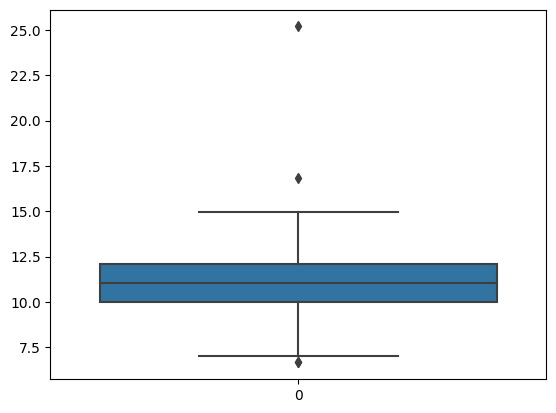

In [11]:
# use violinplot from seaborn
sns.boxplot(fulldata['covid_admission_rate'])

In [12]:
# remove outliers
fulldata = fulldata.drop([74,78,181,183])

# Summary of data after removing outliers
fulldata

,admitted_covid,admitted_total,discharged_total,daily_partial,daily_full,daily_booster,daily_booster2,cases_new,cases_import,cases_unvax,...,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80,covid_admission_rate
0,2113,3115,3150,310078,185406,0,0,17150,1,11255,...,1487,1274,4489,3610,2188,1444,845,296,117,12.320700
1,2140,3043,3182,236796,251886,0,0,15764,6,10315,...,1345,1130,4296,3295,1896,1296,723,256,93,13.575235
2,2207,2880,2596,253804,250455,0,0,17105,37,11010,...,1438,1239,4656,3392,2207,1522,781,299,112,12.902660
3,2420,2904,3317,242610,273184,0,0,19819,23,12681,...,1595,1380,5288,4312,2511,1684,941,296,122,12.210505
4,2144,3538,3367,235753,302377,0,0,20596,34,12261,...,1531,1388,5690,4401,2829,1779,905,344,101,10.409788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,456,669,625,1717,2667,208378,240,4744,429,937,...,446,634,1237,988,572,363,195,82,25,9.612142
179,434,745,767,1735,2888,204555,329,5439,332,969,...,456,957,1529,959,578,384,217,88,26,7.979408
180,409,728,679,1698,2780,178541,407,5522,373,1164,...,570,592,1689,1116,603,350,222,92,32,7.406737
182,345,604,700,527,861,81329,188,4915,188,1008,...,478,545,1409,1034,527,336,244,76,24,7.019329


The reason for creating a new target by diving the total hospital admission value by number of new cases is to have a target representing the percentage of hospital covid admission per new covid cases on one day

## Feature Selection

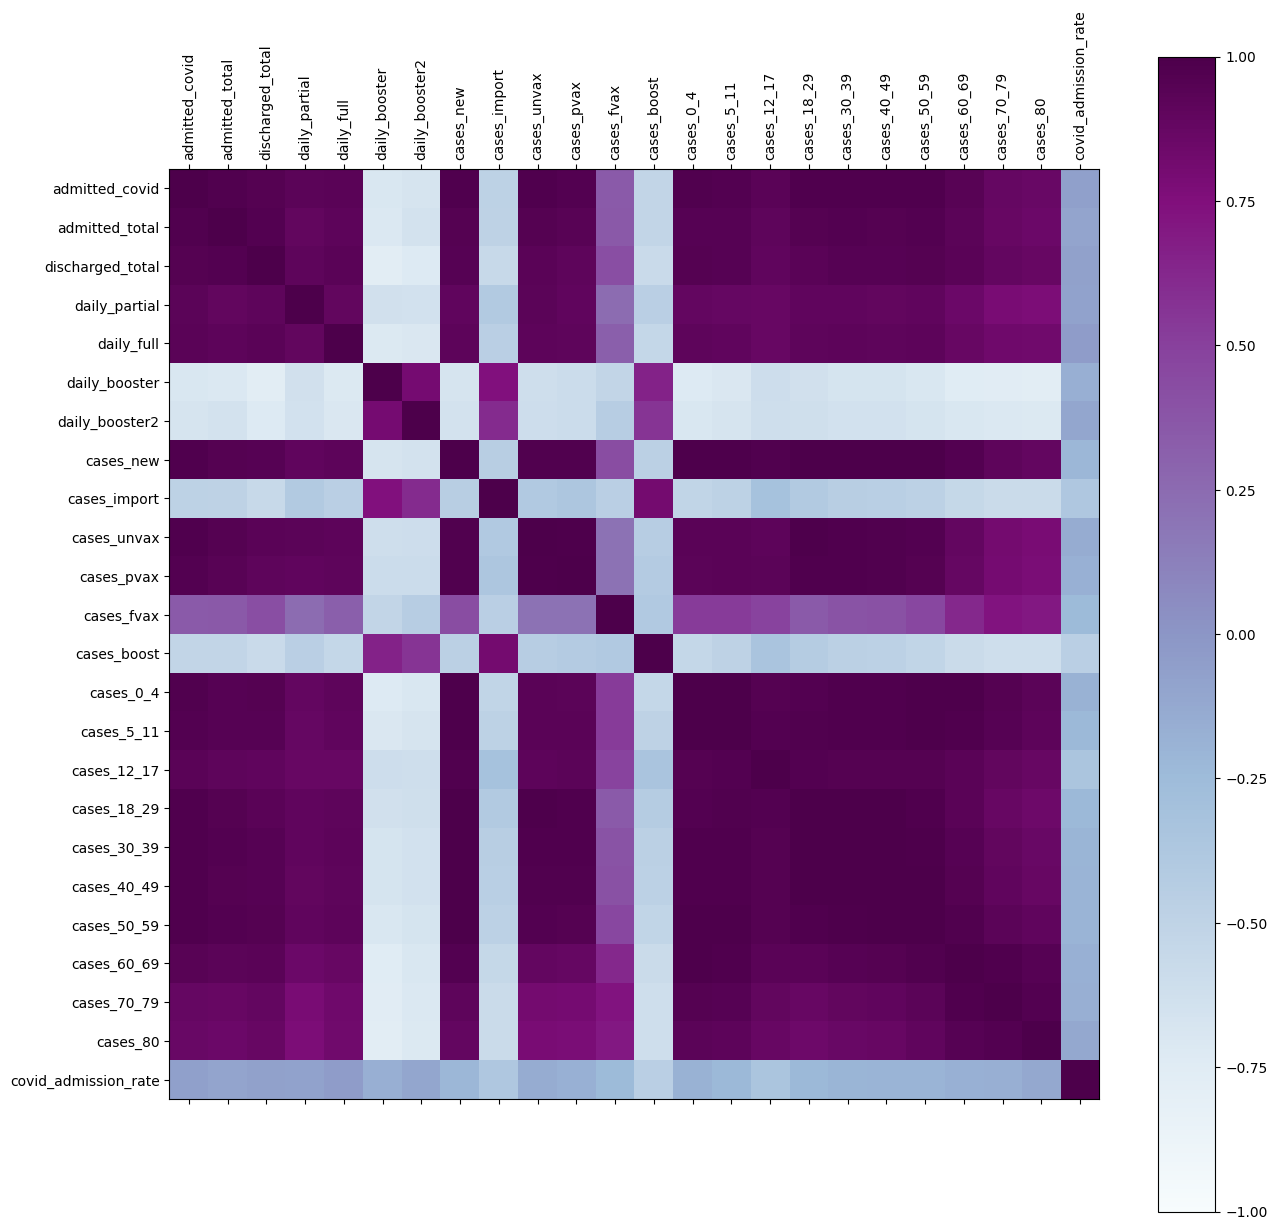

In [13]:
# correlation matrix
correlation = fulldata.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='BuPu', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_figwidth(15)
fig.set_figheight(15)
ticks = np.arange(0,len(fulldata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(fulldata.columns)
ax.set_yticklabels(fulldata.columns)
plt.show()

### Handling Correlated Features

In [14]:
# find correlated features
# if 2 data columns are highly correlated, only let 1 of them remain
correlated_features = set()

for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.85:
            colname = correlation.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

17
{'cases_70_79', 'cases_12_17', 'discharged_total', 'cases_18_29', 'cases_50_59', 'cases_pvax', 'cases_80', 'cases_60_69', 'cases_0_4', 'cases_unvax', 'admitted_total', 'daily_partial', 'cases_5_11', 'cases_new', 'cases_40_49', 'daily_full', 'cases_30_39'}


In [15]:
# remove correlated features from data set
fulldata.drop(labels=correlated_features, axis=1, inplace=True)

# data after removing correlated features
fulldata

,admitted_covid,daily_booster,daily_booster2,cases_import,cases_fvax,cases_boost,covid_admission_rate
0,2113,0,0,1,1185,0,12.320700
1,2140,0,0,6,1132,0,13.575235
2,2207,0,0,37,1344,0,12.902660
3,2420,0,0,23,1553,0,12.210505
4,2144,0,0,34,1725,0,10.409788
...,...,...,...,...,...,...,...
178,456,208378,240,429,2925,856,9.612142
179,434,204555,329,332,3444,994,7.979408
180,409,178541,407,373,3268,1070,7.406737
182,345,81329,188,188,2798,1078,7.019329


## Data Normalization

In [16]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the dataset
fulldata_norm = scaler.fit_transform(fulldata)

# convert numpy array back to dataframe for train, test, validation split
column_names = [
    'admitted_covid',
    'daily_booster',
    'daily_booster2',
    'cases_import',
    'cases_fvax',
    'cases_boost',
    'covid_admission_rate'
]

fulldata_final = pd.DataFrame(fulldata_norm, columns=column_names)

# Showing data after normalization 
fulldata_final

,admitted_covid,daily_booster,daily_booster2,cases_import,cases_fvax,cases_boost,covid_admission_rate
0,0.762061,0.000000,0.000000,0.001916,0.007235,0.000000,0.665882
1,0.773099,0.000000,0.000000,0.011494,0.000000,0.000000,0.823458
2,0.800491,0.000000,0.000000,0.070881,0.028938,0.000000,0.738979
3,0.887572,0.000000,0.000000,0.044061,0.057467,0.000000,0.652041
4,0.774734,0.000000,0.000000,0.065134,0.080945,0.000000,0.425861
...,...,...,...,...,...,...,...
176,0.084628,0.781669,0.285375,0.821839,0.244745,0.656442,0.325672
177,0.075634,0.767328,0.391201,0.636015,0.315588,0.762270,0.120591
178,0.065413,0.669744,0.483948,0.714559,0.291564,0.820552,0.048661
179,0.039248,0.305082,0.223543,0.360153,0.227409,0.826687,0.000000


## Data Splitting

The data was split into 70% training and 30% testing set

In [17]:
# set x (independent) and y (dependent) values
x = fulldata_final.drop('covid_admission_rate', axis=1)
y = fulldata_final['covid_admission_rate']

# visualise data shape
print("X: ",x.shape)
print("Y: ",y.shape)

X:  (181, 6)
Y:  (181,)


In [18]:
# split train, test and validation data
# split data into training set and temp set (70:30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

# Print the shapes of the resulting sets
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (126, 6)
x_test: (55, 6)
y_train: (126,)
y_test: (55,)


## Regression Model

### Linear Regression

In [19]:
# Define model
lr_model = LinearRegression()

# Record start time
startTime = time.time()

# Train model
lr_model.fit(x_train, y_train)

# Record end time
endTime = time.time()

# Training time 
lr_trainTime = endTime - startTime

# Prediction on test data
lr_y_predict = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_y_predict)

print(f"Training Time: {lr_trainTime} seconds")
print("Mean Squared Error:", lr_mse)

Training Time: 0.001995086669921875 seconds
Mean Squared Error: 0.014962952604056941


### Support Vector Regression

In [21]:
# Define model
svr_model = SVR(kernel='poly', C=1.0, epsilon=0.01)

# Record start time
startTime = time.time()

# Train model
svr_model.fit(x_train, y_train)

# Record end time
endTime = time.time()

# Training time 
svr_trainTime = endTime - startTime

# Prediction on test data
svr_y_predict = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_y_predict)

print(f"Training Time: {svr_trainTime} seconds")
print("Mean Squared Error:", svr_mse)

Training Time: 0.003999948501586914 seconds
Mean Squared Error: 0.012318575896848507


### RandomForestRegressor

In [23]:
# Define model
rf_model = RandomForestRegressor(n_estimators=165, random_state=42)

# Record start time
startTime = time.time()

# Train model
rf_model.fit(x_train, y_train)

# Record end time
endTime = time.time()

# Training time 
rf_trainTime = endTime - startTime

# Prediction on test data
rf_y_predict = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_y_predict)

print(f"Training Time: {rf_trainTime} seconds")
print("Mean Squared Error:", rf_mse)

Training Time: 0.17100763320922852 seconds
Mean Squared Error: 0.013470216065861813


### K-Nearest Neighbors (KNN) Regressor

In [25]:
# Define model
knn_model = KNeighborsRegressor(n_neighbors=7)

# Record start time
startTime = time.time()

# Train model
knn_model.fit(x_train, y_train)

# Record end time
endTime = time.time()

# Training time 
knn_trainTime = endTime - startTime

# Prediction on test data
knn_y_predict = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_predict)

print(f"Training Time: {knn_trainTime} seconds")
print("Mean Squared Error:", knn_mse)

Training Time: 0.0010123252868652344 seconds
Mean Squared Error: 0.016767933761146624


## Comparison of models

In [27]:
# Compare the results 
print("Training Speed")
print(f"Linear Regression: {lr_trainTime} seconds")
print(f"SVR: {svr_trainTime} seconds")
print(f"Random Forest: {rf_trainTime} seconds")
print(f"KNN: {knn_trainTime} seconds")

print("Mean Squared Error")
print("Linear Regression: ", lr_mse)
print("SVR: ", svr_mse)
print("Random Forest: ", rf_mse)
print("KNN: ", knn_mse)

Training Speed
Linear Regression: 0.001995086669921875 seconds
SVR: 0.003999948501586914 seconds
Random Forest: 0.17100763320922852 seconds
KNN: 0.0010123252868652344 seconds
Mean Squared Error
Linear Regression:  0.014962952604056941
SVR:  0.012318575896848507
Random Forest:  0.013470216065861813
KNN:  0.016767933761146624
